<a href="https://colab.research.google.com/github/tvshhar/FDS_PUBLIC_REPO/blob/main/2024310002_TUSHHARBARKUR_FDSEXP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv('energy_data.csv')

In [13]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Normalize continuous features
scaler = StandardScaler()
data[['Temperature', 'Humidity']] = scaler.fit_transform(data[['Temperature', 'Humidity']])

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


<ipython-input-13-7ff766b15b9c>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


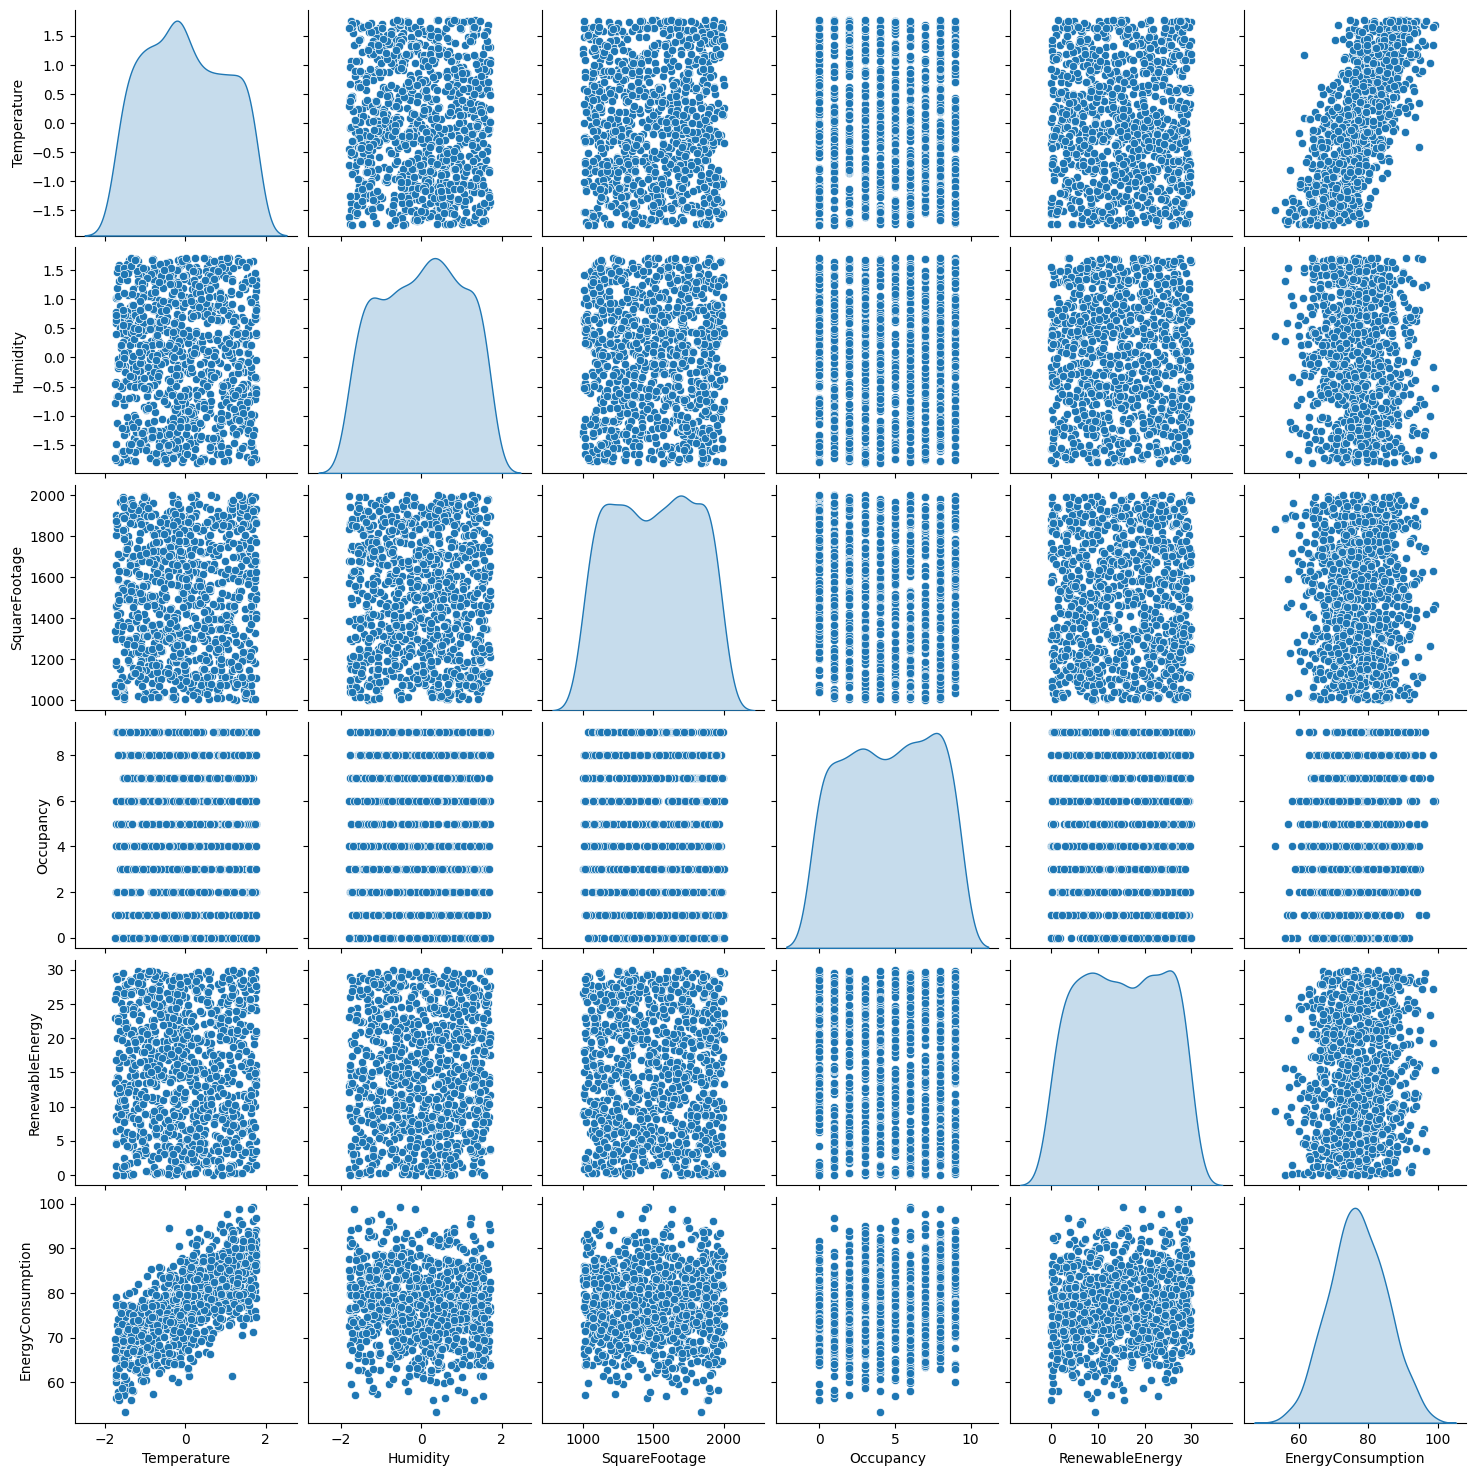

In [14]:
# Visualize data
sns.pairplot(data, diag_kind='kde')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split data
X = data[['Temperature', 'Humidity', 'Occupancy']]
y = data['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Train model
model = Ridge()
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 31.84364097953031


In [16]:
!pip install streamlit==1.28.1

In [17]:
import streamlit as st
import numpy as np

# Streamlit app
st.title("Energy Consumption Prediction")

# Input fields
temperature = st.number_input("Temperature (°C)")
humidity = st.number_input("Humidity (%)")
occupancy = st.radio("Occupancy", (0, 1))

# Prediction button
if st.button("Predict"):
  # Make prediction
  input_features = np.array([[temperature, humidity, occupancy]])
  prediction = model.predict(input_features)[0]
  st.write(f"Predicted Energy Consumption: {prediction:.2f} kWh")

In [18]:
import joblib
joblib.dump(model, 'ridge_model.pkl')

['ridge_model.pkl']